# Linear Regression Model

## First Attempt

### Importing Libraries and Library Functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

### Load and Describe Data

In [2]:
data_path = 'realtor-data.csv'  
data = pd.read_csv(data_path)

print(data.describe())
print(data.info())


FileNotFoundError: [Errno 2] No such file or directory: 'realtor-data.csv'

### Preliminary Data Handling

In [ ]:
features = ['brokered_by', 'bed', 'bath', 'acre_lot', 'street', 'zip_code', 'house_size']
target = 'price'

data = data.dropna(subset=features + [target])

scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

### Visualizing Data Correlation Using Heatmap

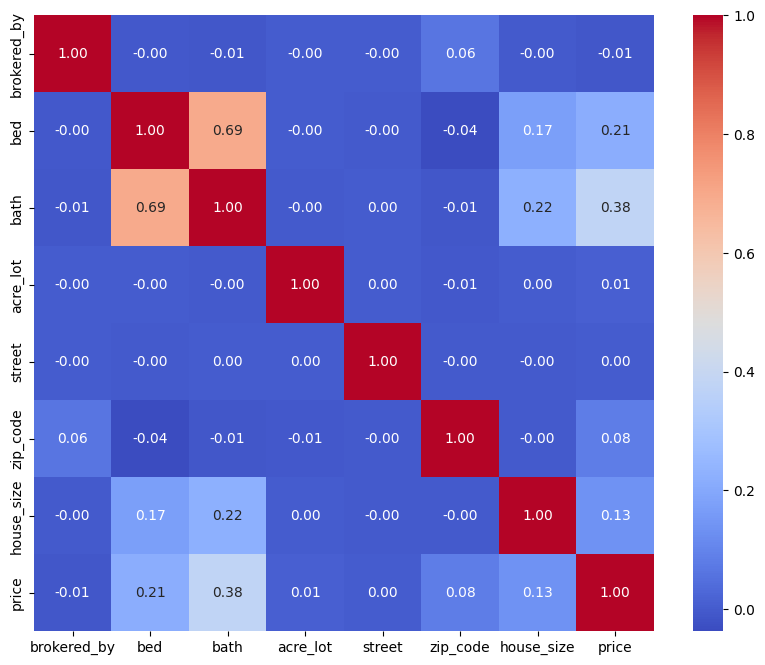

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[features + [target]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Preparing Data for Model

In [ ]:
X = data[features].values
y = data[target].values

## Splitting Train and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating and Training the Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Making Predictions and Evaluating the Model

In [ ]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 994866083116.30
R-squared: 0.19


### Visualizing Results

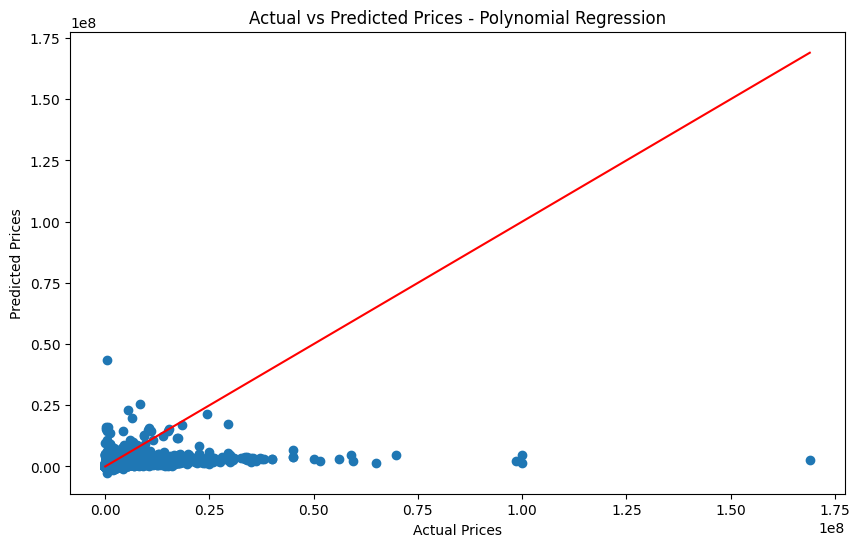

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Polynomial Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  
plt.show()

## Attempt 2

First few rows of the dataset:
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_r

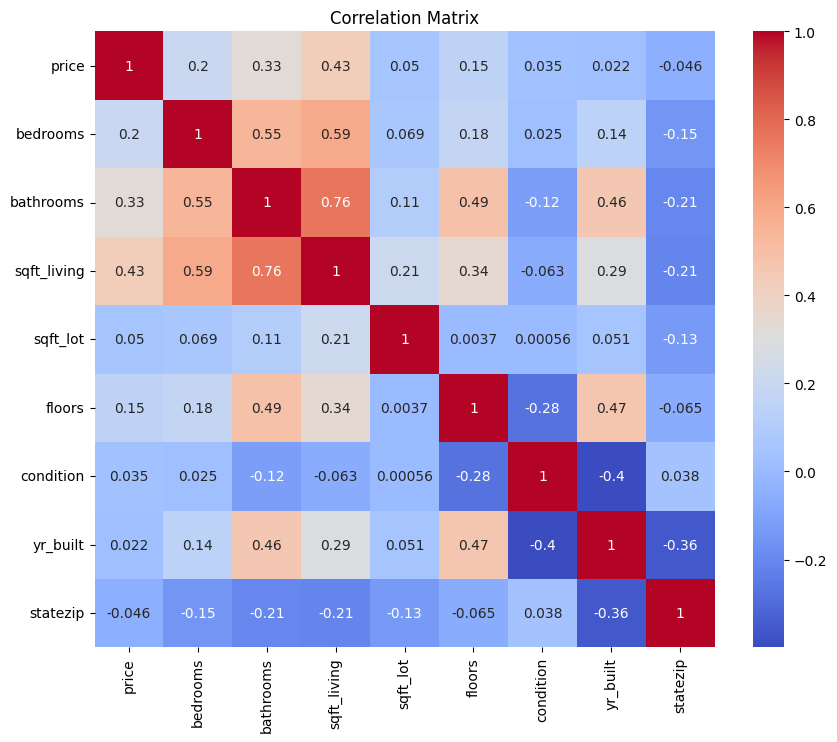

Mean Squared Error: 991657231245.96
R-squared: 0.03


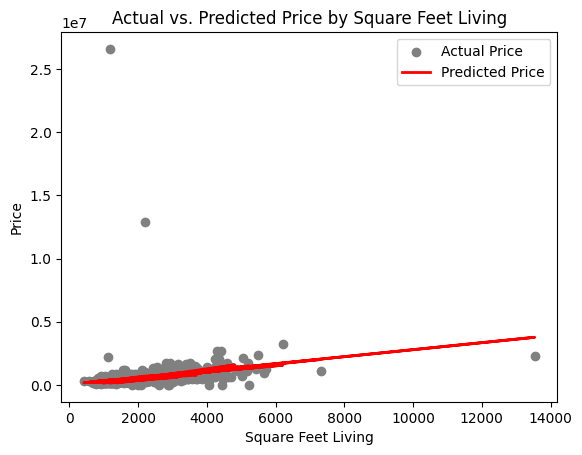

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('data.csv')  

print("First few rows of the dataset:")
print(df.head())

df.drop(['date', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'street', 'city', 'country'], axis=1, inplace=True)

df['statezip'] = df['statezip'].apply(lambda x: int(x.split(' ')[1]))

print("\nMissing values in each column:")
print(df.isnull().sum())
df.dropna(inplace=True) 

print("\nDataFrame info after preprocessing:")
print(df.info())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']

X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r_squared:.2f}')

plt.scatter(X_test['sqft_living'], y_test, color='gray', label='Actual Price')
plt.plot(X_test['sqft_living'], y_pred, color='red', linewidth=2, label='Predicted Price')
plt.xlabel('Square Feet Living')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price by Square Feet Living')
plt.legend()
plt.show()

### Attempt 3

Loading the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   o

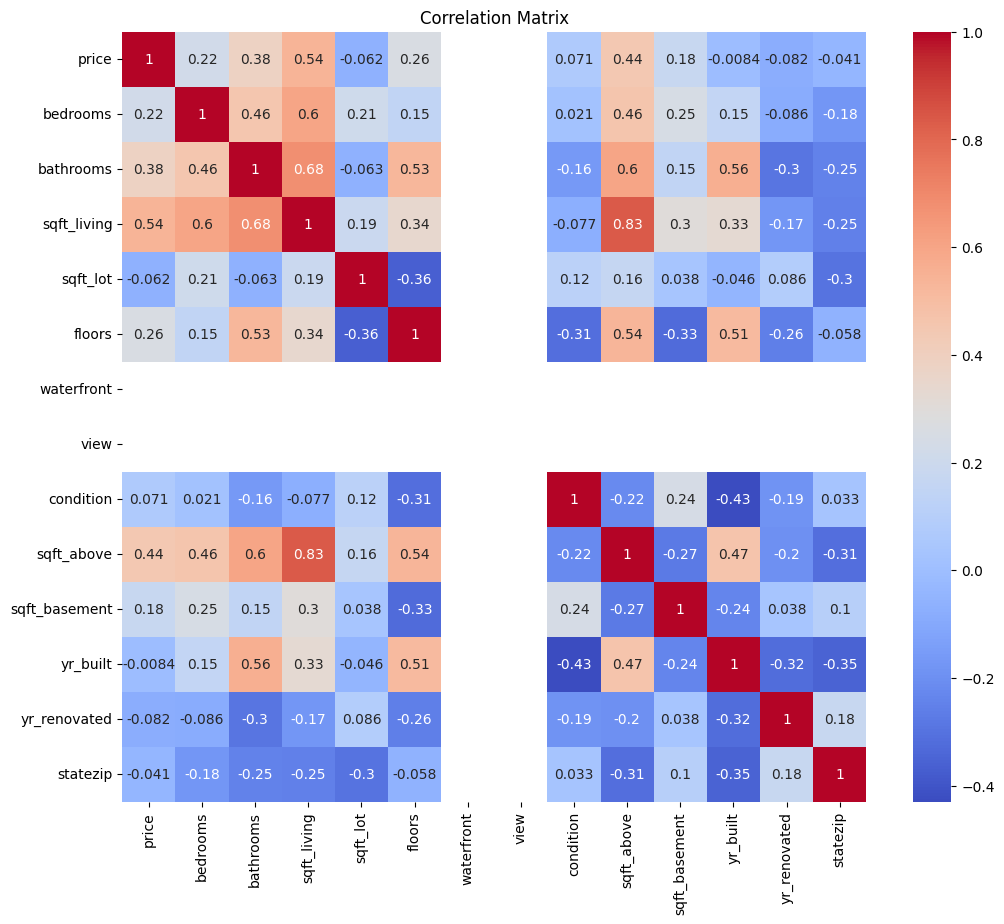

Correlation matrix displayed
Non-numeric columns re-integrated after outlier removal
Data split into training and test sets
Features scaled
Model trained & predictions made
Cross-Validation Scores: [0.28621571 0.31709405 0.30664122 0.34487535 0.34488493]
Mean CV Score: 0.32


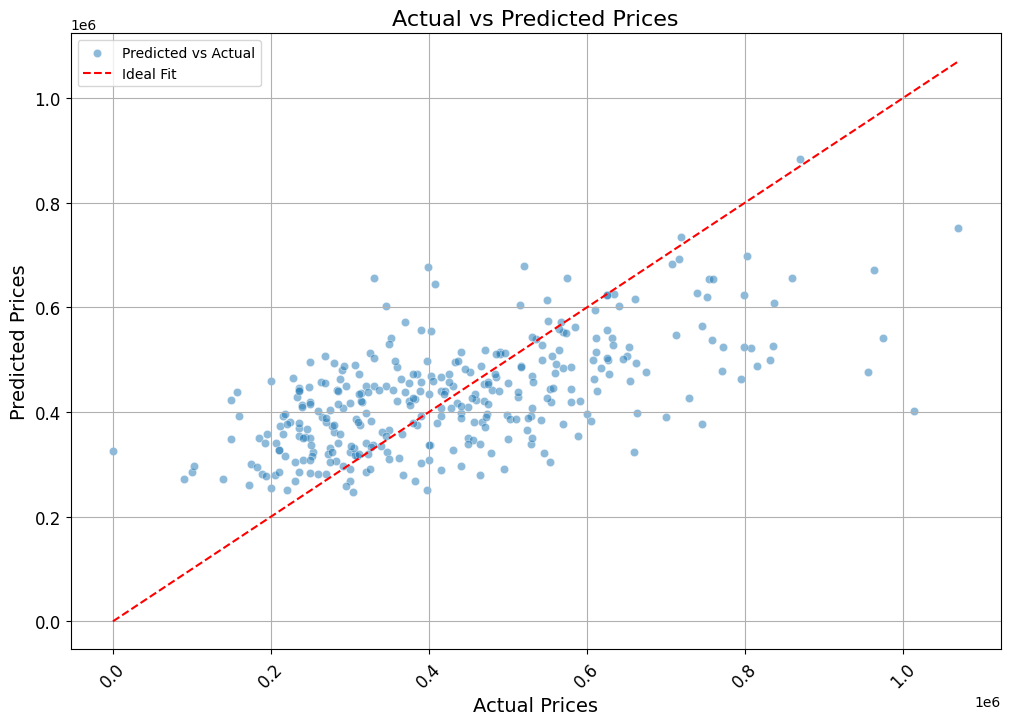

Mean Squared Error: 20578165656.66
R-squared: 0.38

Cross-Validation Scores: [0.28621571 0.31709405 0.30664122 0.34487535 0.34488493]
Mean CV Score: 0.32


In [4]:
# Importing libraries and library functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
print("Loading the dataset")
data_path = 'data.csv'
df = pd.read_csv(data_path)

# Check dataset
print(df.info())
print("Data loaded successfully\n")

# Convert statezip to an integer for better processing
df['statezip'] = df['statezip'].apply(lambda x: int(x.split(' ')[1]) if pd.notnull(x) else np.nan)

# Handle missing values: Fill missing values with the median of each numeric column
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Convert date columns to datetime if necessary
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

# Feature Engineering: Add new features or transformations
df['age'] = 2014 - df['yr_built']  # Assuming the dataset is up to date to 2014

# Include all features for the model
features = df.drop(['price'], axis=1).columns

# Handle outliers based on IQR for each numeric feature
for feature in numeric_cols:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)))]
print("Outliers removed")

# Drop non-numeric columns for correlation matrix
df_numeric = df.select_dtypes(include=[np.number])
print("Non-numeric columns dropped for correlation matrix")

# Display the correlation matrix
print("\nDisplaying correlation matrix")
plt.figure(figsize=(12, 10))
numeric_df = df[numeric_cols]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print("Correlation matrix displayed")

# Re-integrate non-numeric columns after outlier removal
df = df.loc[df_numeric.index]
print("Non-numeric columns re-integrated after outlier removal")

# Feature Engineering: Add polynomial features and interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[["sqft_living", "sqft_above", "sqft_basement"]])
poly_feature_names = poly.get_feature_names_out(["sqft_living", "sqft_above", "sqft_basement"])
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)
df = pd.concat([df, df_poly], axis=1)

# Define features and target
features = ["bedrooms", "bathrooms", "sqft_living", "floors", "statezip", "waterfront",
            "view", "sqft_above", "sqft_basement", "yr_renovated"] + list(poly_feature_names)
X = df[features]
y = df["price"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("Data split into training and test sets")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled")

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Model trained & predictions made")

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores):.2f}')

# Visualize results
plt.figure(figsize=(12, 8))
plt.scatter(
    y_test,
    y_pred,
    alpha=0.5,
    edgecolors="w",
    linewidth=0.5,
    label="Predicted vs Actual",
)
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    color="red",
    linestyle="--",
    label="Ideal Fit",
)
plt.xlabel("Actual Prices", fontsize=14)
plt.ylabel("Predicted Prices", fontsize=14)
plt.title("Actual vs Predicted Prices", fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r_squared:.2f}')

# Cross-Validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'\nCross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores):.2f}')


Loading the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   o

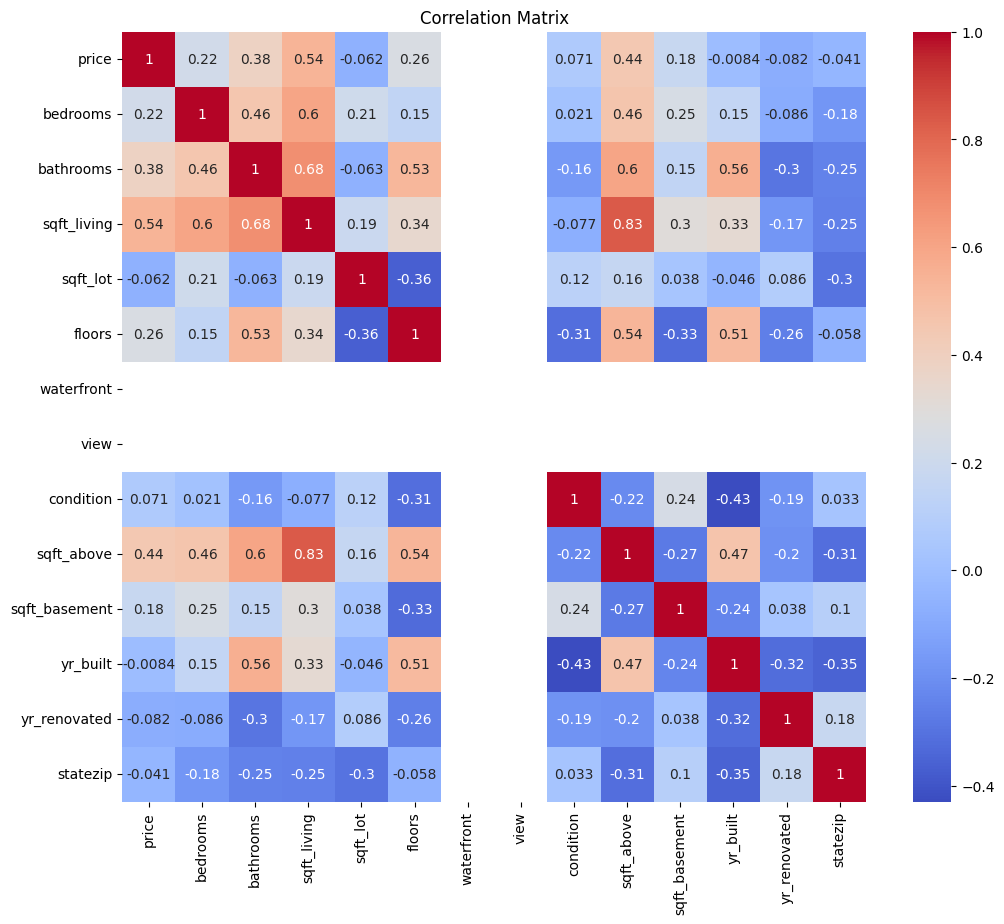

[I 2024-05-26 00:52:41,769] A new study created in memory with name: no-name-0b1132e1-9473-4c02-ad1e-338d45595b6e
[I 2024-05-26 00:52:41,783] Trial 0 finished with value: 0.38839719864031075 and parameters: {'poly_degree': 3}. Best is trial 0 with value: 0.38839719864031075.
[I 2024-05-26 00:52:41,812] Trial 1 finished with value: 0.3801919174765437 and parameters: {'poly_degree': 2}. Best is trial 0 with value: 0.38839719864031075.
[I 2024-05-26 00:52:41,832] Trial 2 finished with value: 0.38839719864031075 and parameters: {'poly_degree': 3}. Best is trial 0 with value: 0.38839719864031075.
[I 2024-05-26 00:52:41,842] Trial 3 finished with value: 0.38839719864031075 and parameters: {'poly_degree': 3}. Best is trial 0 with value: 0.38839719864031075.
[I 2024-05-26 00:52:41,851] Trial 4 finished with value: 0.3801919174765437 and parameters: {'poly_degree': 2}. Best is trial 0 with value: 0.38839719864031075.
[I 2024-05-26 00:52:41,858] Trial 5 finished with value: 0.3801919174765437 an

Correlation matrix displayed
Non-numeric columns re-integrated after outlier removal


[I 2024-05-26 00:52:41,965] Trial 17 finished with value: 0.3717095201345826 and parameters: {'poly_degree': 1}. Best is trial 0 with value: 0.38839719864031075.
[I 2024-05-26 00:52:41,977] Trial 18 finished with value: 0.38839719864031075 and parameters: {'poly_degree': 3}. Best is trial 0 with value: 0.38839719864031075.
[I 2024-05-26 00:52:41,985] Trial 19 finished with value: 0.3801919174765437 and parameters: {'poly_degree': 2}. Best is trial 0 with value: 0.38839719864031075.


Best Parameters: {'poly_degree': 3}
Data split into training and test sets
Features scaled
Model trained & predictions made
Cross-Validation Scores: [0.28804652 0.31337706 0.3030281  0.34780805 0.35063089]
Mean CV Score: 0.32


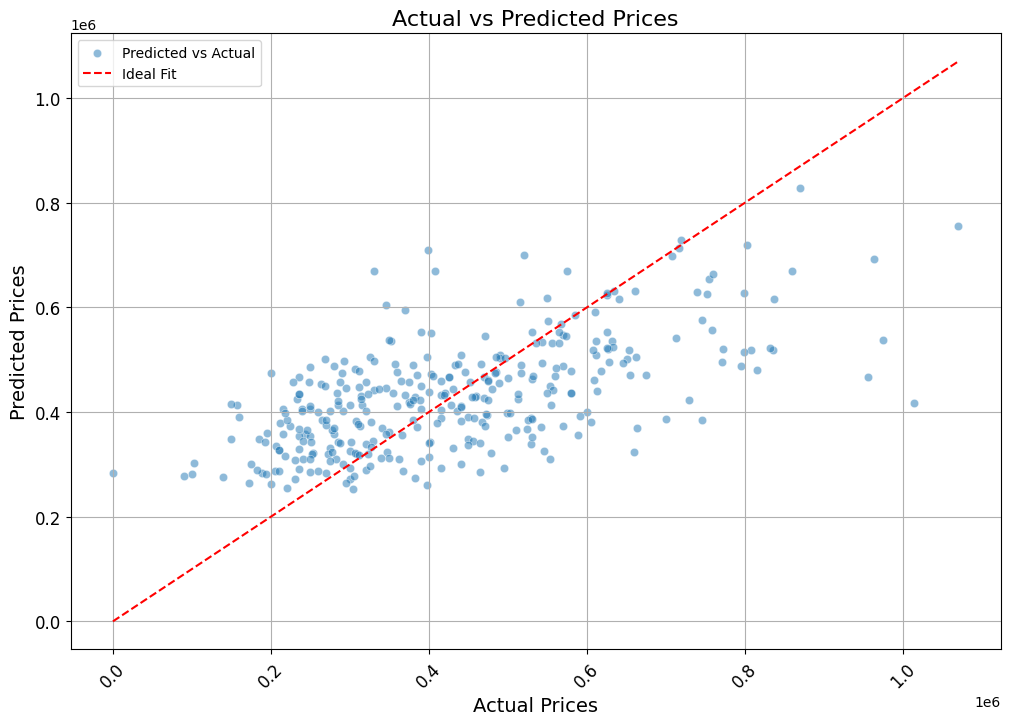

Mean Squared Error: 20305743208.79
R-squared: 0.39

Cross-Validation Scores: [0.28804652 0.31337706 0.3030281  0.34780805 0.35063089]
Mean CV Score: 0.32


In [6]:
# Importing libraries and library functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import optuna

# Load the dataset
print("Loading the dataset")
data_path = 'data.csv'
df = pd.read_csv(data_path)

# Check dataset
print(df.info())
print("Data loaded successfully\n")

# Convert statezip to an integer for better processing
df['statezip'] = df['statezip'].apply(lambda x: int(x.split(' ')[1]) if pd.notnull(x) else np.nan)

# Handle missing values: Fill missing values with the median of each numeric column
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Convert date columns to datetime if necessary
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

# Feature Engineering: Add new features or transformations
df['age'] = 2014 - df['yr_built']  # Assuming the dataset is up to date to 2014

# Include all features for the model
features = df.drop(['price'], axis=1).columns

# Handle outliers based on IQR for each numeric feature
for feature in numeric_cols:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)))]
print("Outliers removed")

# Drop non-numeric columns for correlation matrix
df_numeric = df.select_dtypes(include=[np.number])
print("Non-numeric columns dropped for correlation matrix")

# Display the correlation matrix
print("\nDisplaying correlation matrix")
plt.figure(figsize=(12, 10))
numeric_df = df[numeric_cols]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print("Correlation matrix displayed")

# Re-integrate non-numeric columns after outlier removal
df = df.loc[df_numeric.index]
print("Non-numeric columns re-integrated after outlier removal")

# Hyperparameter tuning using Optuna
def objective(trial):
    # Define the degree of the polynomial features to try
    poly_degree = trial.suggest_int('poly_degree', 1, 3)
    
    # Feature Engineering: Add polynomial features and interaction terms
    poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
    poly_features = poly.fit_transform(df[["sqft_living", "sqft_above", "sqft_basement"]])
    poly_feature_names = poly.get_feature_names_out(["sqft_living", "sqft_above", "sqft_basement"])
    df_poly = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)
    df_expanded = pd.concat([df, df_poly], axis=1)

    # Define features and target
    features = ["bedrooms", "bathrooms", "sqft_living", "floors", "statezip", "waterfront",
                "view", "sqft_above", "sqft_basement", "yr_renovated"] + list(poly_feature_names)
    X = df_expanded[features]
    y = df_expanded["price"]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    
    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate R2 score
    r2 = r2_score(y_test, y_pred)
    return r2

# Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
print("Best Parameters:", study.best_trial.params)

# Retrain model with the best parameters
best_params = study.best_trial.params
poly = PolynomialFeatures(degree=best_params['poly_degree'], include_bias=False)
poly_features = poly.fit_transform(df[["sqft_living", "sqft_above", "sqft_basement"]])
poly_feature_names = poly.get_feature_names_out(["sqft_living", "sqft_above", "sqft_basement"])
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)
df = pd.concat([df, df_poly], axis=1)

# Define features and target
features = ["bedrooms", "bathrooms", "sqft_living", "floors", "statezip", "waterfront",
            "view", "sqft_above", "sqft_basement", "yr_renovated"] + list(poly_feature_names)
X = df[features]
y = df["price"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("Data split into training and test sets")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled")

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred_final = model.predict(X_test_scaled)
print("Model trained & predictions made")

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores):.2f}')

# Visualize results
plt.figure(figsize=(12, 8))
plt.scatter(
    y_test,
    y_pred_final,
    alpha=0.5,
    edgecolors="w",
    linewidth=0.5,
    label="Predicted vs Actual",
)
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    color="red",
    linestyle="--",
    label="Ideal Fit",
)
plt.xlabel("Actual Prices", fontsize=14)
plt.ylabel("Predicted Prices", fontsize=14)
plt.title("Actual vs Predicted Prices", fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_final)
r_squared = r2_score(y_test, y_pred_final)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r_squared:.2f}')

# Cross-Validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'\nCross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores):.2f}')
